In [1]:
# Code Here
import seaborn as sns

# Load the Palmer Penguins dataset
penguin = sns.load_dataset("penguins")
print(penguin.head())

  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  
0       3750.0    Male  
1       3800.0  Female  
2       3250.0  Female  
3          NaN     NaN  
4       3450.0  Female  


species, island, and sex need to be dummified

Let's use `bill_length_mm` to predict `bill_depth_mm`. Prepare your data and fit the following models on the entire dataset:

* Simple linear regression (e.g. straight-line) model
* Quadratic (degree 2 polynomial) model
* Cubic (degree 3 polynomial) model
* Degree 10 polynomial model

Make predictions for each model and plot your fitted models on the scatterplot.

In [2]:
import pandas as pd
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

for label in penguin.columns:
    penguin[label] = LabelEncoder().fit(penguin[label]).transform(penguin[label])
penguin.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,2,42,56,6,31,1
1,0,2,45,43,11,33,0
2,0,2,51,49,20,12,0
3,0,2,164,80,55,94,2
4,0,2,22,62,18,19,0


In [3]:
X = penguin[['bill_length_mm']]
y = penguin['bill_depth_mm']

In [4]:
# Linear Regression
lr = LinearRegression()
lr.fit(X, y)
y_lr = lr.predict(X)
penguin['y_lr'] = y_lr
penguin

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,y_lr
0,0,2,42,56,6,31,1,44.381766
1,0,2,45,43,11,33,0,44.098323
2,0,2,51,49,20,12,0,43.531437
3,0,2,164,80,55,94,2,32.855089
4,0,2,22,62,18,19,0,46.271385
...,...,...,...,...,...,...,...,...
339,2,0,164,80,55,94,2,32.855089
340,2,0,105,12,39,66,0,38.429465
341,2,0,136,26,46,87,1,35.500555
342,2,0,89,17,36,76,0,39.941161


In [5]:
# Quadratic Model
poly2 = PolynomialFeatures(degree=2)
X_poly2 = poly2.fit_transform(X)

lr_poly2 = LinearRegression()
lr_poly2.fit(X_poly2, y)
y_poly2 = lr_poly2.predict(X_poly2)
penguin['y_poly2'] = y_poly2
penguin

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,y_lr,y_poly2
0,0,2,42,56,6,31,1,44.381766,43.046148
1,0,2,45,43,11,33,0,44.098323,42.009860
2,0,2,51,49,20,12,0,43.531437,40.116569
3,0,2,164,80,55,94,2,32.855089,49.104669
4,0,2,22,62,18,19,0,46.271385,51.481969
...,...,...,...,...,...,...,...,...,...
339,2,0,164,80,55,94,2,32.855089,49.104669
340,2,0,105,12,39,66,0,38.429465,33.833999
341,2,0,136,26,46,87,1,35.500555,38.975743
342,2,0,89,17,36,76,0,39.941161,33.676893


In [6]:
# Cubic Model
poly3 = PolynomialFeatures(degree=3)
X_poly3 = poly3.fit_transform(X)

lr_poly3 = LinearRegression()
lr_poly3.fit(X_poly3, y)
y_poly3 = lr_poly3.predict(X_poly3)
penguin['y_poly3'] = y_poly3
penguin

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,y_lr,y_poly2,y_poly3
0,0,2,42,56,6,31,1,44.381766,43.046148,50.721764
1,0,2,45,43,11,33,0,44.098323,42.009860,49.930876
2,0,2,51,49,20,12,0,43.531437,40.116569,47.979533
3,0,2,164,80,55,94,2,32.855089,49.104669,73.154630
4,0,2,22,62,18,19,0,46.271385,51.481969,51.594305
...,...,...,...,...,...,...,...,...,...,...
339,2,0,164,80,55,94,2,32.855089,49.104669,73.154630
340,2,0,105,12,39,66,0,38.429465,33.833999,27.398875
341,2,0,136,26,46,87,1,35.500555,38.975743,35.631548
342,2,0,89,17,36,76,0,39.941161,33.676893,31.552778


In [7]:
# Polynomial Model
poly10 = PolynomialFeatures(degree=10)
X_poly10 = poly10.fit_transform(X)

lr_poly10 = LinearRegression()
lr_poly10.fit(X_poly10, y)
y_poly10 = lr_poly10.predict(X_poly10)
penguin['y_poly10'] = y_poly10
penguin

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,y_lr,y_poly2,y_poly3,y_poly10
0,0,2,42,56,6,31,1,44.381766,43.046148,50.721764,51.252803
1,0,2,45,43,11,33,0,44.098323,42.009860,49.930876,51.324542
2,0,2,51,49,20,12,0,43.531437,40.116569,47.979533,50.879571
3,0,2,164,80,55,94,2,32.855089,49.104669,73.154630,57.759103
4,0,2,22,62,18,19,0,46.271385,51.481969,51.594305,49.366166
...,...,...,...,...,...,...,...,...,...,...,...
339,2,0,164,80,55,94,2,32.855089,49.104669,73.154630,57.759103
340,2,0,105,12,39,66,0,38.429465,33.833999,27.398875,22.606064
341,2,0,136,26,46,87,1,35.500555,38.975743,35.631548,41.965477
342,2,0,89,17,36,76,0,39.941161,33.676893,31.552778,26.948287


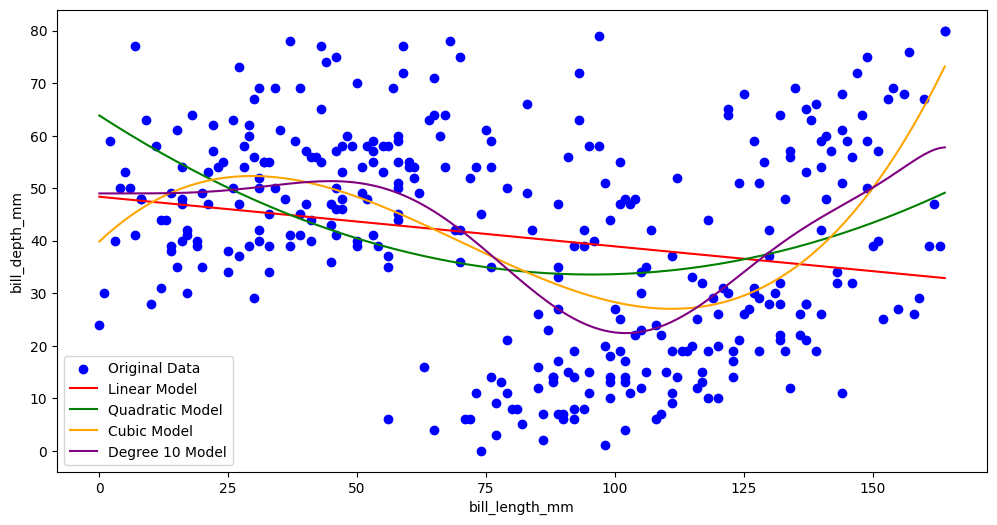

In [8]:
sorted_idx = X['bill_length_mm'].argsort()
X_sorted = X['bill_length_mm'][sorted_idx]
y_sorted = y[sorted_idx]

plt.figure(figsize=(12, 6))
plt.scatter(X_sorted, y_sorted, color='blue', label='Original Data')
plt.plot(X_sorted, y_lr[sorted_idx], color='red', label='Linear Model')
plt.plot(X_sorted, y_poly2[sorted_idx], color='green', label='Quadratic Model')
plt.plot(X_sorted, y_poly3[sorted_idx], color='orange', label='Cubic Model')
plt.plot(X_sorted, y_poly10[sorted_idx], color='purple', label='Degree 10 Model')
plt.xlabel("bill_length_mm")
plt.ylabel("bill_depth_mm")
plt.legend()
plt.show()

* Are any of the models above underfitting the data? If so, which ones and how can you tell?
* Are any of thhe models above overfitting the data? If so, which ones and how can you tell?
* Which of the above models do you think fits the data best and why?

the linear model undefits the data since it is a straight line that is trying to fit a nunch of points. the 10 degree model seems to over fit by trying to get the extreme behavoirs. The cubic model fits the data well. It doesn't show signs of underfitting or overfitting.